<h1>CROSS VALIDATION</H1>

<h2>Se configura el mejor modelo del caso 1 el cual es el modelo de regresión ponderada.  </h2>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [6]:
#Importar base de datos
df = pd.read_csv('nike_shoes_sales.csv')

In [7]:
df.drop(['discount', 'images'], axis=1, inplace=True)

In [8]:
df['description'].fillna('', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_23936\2526826900.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna('', inplace=True)


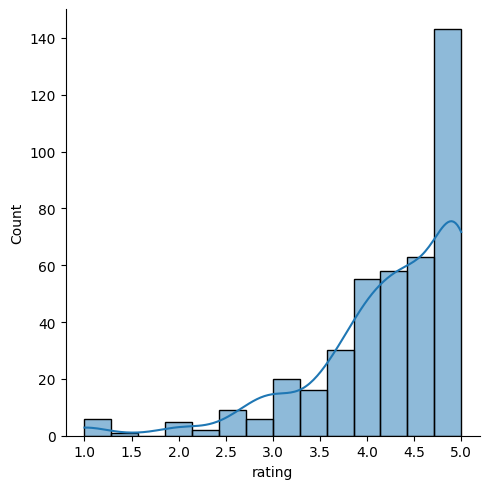

In [9]:
sns.displot(data=df[df["rating"] != 0], x="rating", kde=True)

<h3>Categorización de la variable rating por medio de escala de detractores o promotores.</h3>

In [10]:
#categorizacion del rating

def categorize_rating(rating):
    if rating < 2:
        return 1
    elif rating < 4:
        return 2
    else:
        return 3

df['category'] = df['rating'].apply(categorize_rating)

print(df)

                             product_name  product_id  listing_price  \
0          Nike Air Force 1 '07 Essential  CJ1646-600              0   
1                    Nike Air Force 1 '07  CT4328-101              0   
2            Nike Air Force 1 Sage Low LX  CI3482-200              0   
3                     Nike Air Max Dia SE  CD0479-200              0   
4                     Nike Air Max Verona  CZ6156-101              0   
..                                    ...         ...            ...   
638                    Air Jordan 8 Retro  CI1236-100          15995   
639            Nike Phantom Venom Club IC  AO0578-717           4995   
640  Nike Mercurial Superfly 7 Academy TF  AT7978-414           8495   
641                       Nike Air Max 98  AH6799-300              0   
642                        Nike P-6000 SE  CJ9585-600           8995   

     sale_price brand                                        description  \
0          7495  Nike  Let your shoe game shimmer in the Ni

<h3>La eliminación de los valores atípicos de la variable "reviews" se llevó a cabo</h3>

In [11]:
#eliminar atipicos de reviews
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# cuartiles
Q1 = df['reviews'].quantile(0.25)
Q3 = df['reviews'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_atip_reviews = df[(df['reviews'] > lower_bound) & (df['reviews'] < upper_bound)]

In [12]:
valores_unicos = df_atip_reviews['reviews'].unique()


<h3>La imputación de la variable listing_price para los valores faltantes se realizó mediante la media de la propia variable.</h3>

In [13]:
df_media = df_atip_reviews.copy()
df_media['listing_price'].replace(0, pd.NA, inplace=True)

# Calcular la media de la columna "listing_price" excluyendo los valores NaN
media_listing_price = df_atip_reviews['listing_price'].mean()

# Imputar los valores faltantes en la columna "listing_price" con la media calculada
df_media['listing_price'].fillna(media_listing_price, inplace=True)

# Imprimir las primeras filas del DataFrame con valores imputados
print(df_media.head())

print(media_listing_price)

                     product_name  product_id  listing_price  sale_price  \
0  Nike Air Force 1 '07 Essential  CJ1646-600    3785.427273        7495   
1            Nike Air Force 1 '07  CT4328-101    3785.427273        7495   
2    Nike Air Force 1 Sage Low LX  CI3482-200    3785.427273        9995   
3             Nike Air Max Dia SE  CD0479-200    3785.427273        9995   
4             Nike Air Max Verona  CZ6156-101    3785.427273        9995   

  brand                                        description  rating  reviews  \
0  Nike  Let your shoe game shimmer in the Nike Air For...     0.0        0   
1  Nike  The legend lives on in the Nike Air Force 1 '0...     0.0        0   
2  Nike  Taking both height and craft to new levels, th...     0.0        0   
3  Nike  Designed for a woman's foot, the Nike Air Max ...     0.0        0   
4  Nike  Pass on the good vibes in the Nike Air Max Ver...     0.0        0   

   category  
0         1  
1         1  
2         1  
3         1 

C:\Users\DELL\AppData\Local\Temp\ipykernel_23936\2446400765.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_media['listing_price'].replace(0, pd.NA, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_23936\2446400765.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_media['listing_price'].fill

In [14]:
# Eliminar las filas donde el valor de "listing_price" es igual a 0
df_nuevo = df_atip_reviews.copy()
df_nuevo = df_atip_reviews[df_atip_reviews['listing_price'] != 0]

print(df_nuevo.head())

                                  product_name  product_id  listing_price  \
21                          Nike SB Bruin High  923112-001           7995   
33                    Nike Joyride Run FlyKnit  CI3707-100          15995   
56                    Nike Air Max Tailwind 99  CQ6569-001          15995   
69  Nike Epic Phantom React A.I.R. Cody Hudson  CI1718-001          13995   
87                    Nike Free RN Flyknit 3.0  AQ5707-001          10995   

    sale_price brand                                        description  \
21        5597  Nike  The first Nike SB shoe designed specifically f...   
33       11997  Nike  The Nike Joyride Run Flyknit is designed to he...   
56       11197  Nike  The Nike Air Max Tailwind 99 has a storied his...   
69        8397  Nike  Soft to the touch, the Nike Epic Phantom React...   
87        7697  Nike  Ideal for runs up to 3 miles, the Nike Free RN...   

    rating  reviews  category  
21     4.2        6         3  
33     0.0        0   

In [15]:
df_nuevo.shape

(183, 9)

Se puede observar como la base de datos pasa de 643 registros a 183 registros, eliminando los datos con listing_price = 0.

<h3>La transformación de la variable sale_price se realizó mediante la limpieza por cuartiles de los valores atípicos y el método de raíz cúbica.</h3>

La razón por la que la transformación es de tipo cúbica se debe a un problema dentro de la estructuración de la base de datos, puesto que se evidenció heterocedasticidad fuerte dentro de la variable (Y) "sale_price", además de valores atípicos que ejercían efectos negativos en la distribución de los datos.

Posiblemente hay un error desde la toma de datos, ya que se encuentran muchos vacios y valores atípicos.

C:\Users\DELL\AppData\Local\Temp\ipykernel_23936\234381618.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['sale_price_cbrt'] = np.cbrt(df_nuevo['sale_price'])


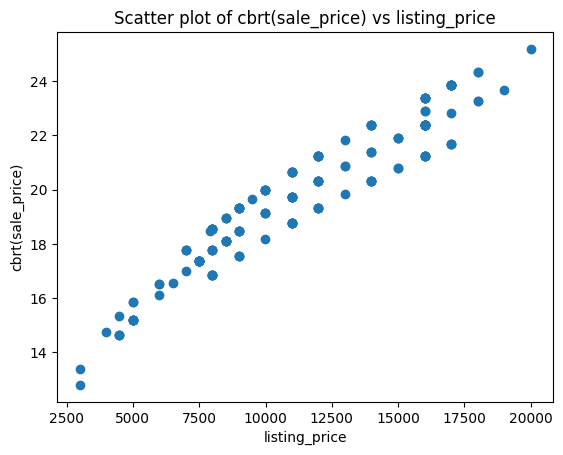

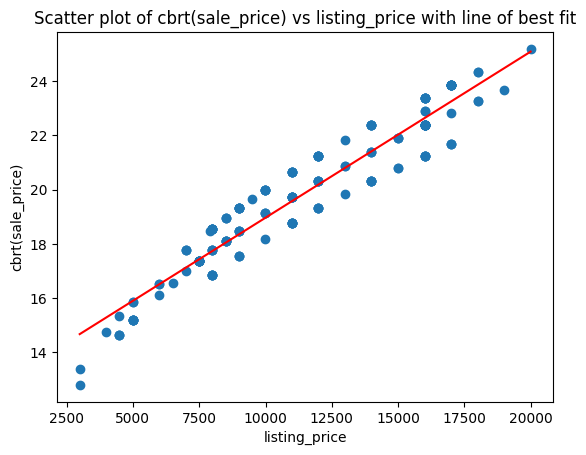

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Aplicar la transformación de raíz cúbica a la variable sale_price
df_nuevo['sale_price_cbrt'] = np.cbrt(df_nuevo['sale_price'])

# Calcular el quartil 1 y el quartil 3 de la variable sale_price transformada
Q1 = df_nuevo['sale_price_cbrt'].quantile(0.25)
Q3 = df_nuevo['sale_price_cbrt'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites inferior y superior para los valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar y eliminar los valores atípicos
df_no_outliers = df_nuevo[(df_nuevo['sale_price_cbrt'] > lower_bound) & (df_nuevo['sale_price_cbrt'] < upper_bound)]

# Crear un gráfico de dispersión
plt.scatter(df_no_outliers['listing_price'], df_no_outliers['sale_price_cbrt'])
plt.xlabel('listing_price')
plt.ylabel('cbrt(sale_price)')
plt.title('Scatter plot of cbrt(sale_price) vs listing_price')
plt.show()

# Realizar la regresión lineal
slope, intercept = np.polyfit(df_no_outliers['listing_price'], df_no_outliers['sale_price_cbrt'], 1)

# Crear una línea de mejor ajuste
x_values = np.linspace(df_no_outliers['listing_price'].min(), df_no_outliers['listing_price'].max(), 100)
y_values = slope * x_values + intercept

# Graficar la línea de mejor ajuste
plt.scatter(df_no_outliers['listing_price'], df_no_outliers['sale_price_cbrt'])
plt.plot(x_values, y_values, color='red')
plt.xlabel('listing_price')
plt.ylabel('cbrt(sale_price)')
plt.title('Scatter plot of cbrt(sale_price) vs listing_price with line of best fit')
plt.show()


<h2>Modelo de regresión WLS basado en 3 variables independientes y la transformada de 'sale_price'</h2>

In [17]:
# Definir las variables independientes y la variable dependiente
X = df_no_outliers[['listing_price', 'category', 'reviews']]
y = df_no_outliers['sale_price_cbrt']

# Añadir una constante al conjunto de datos para ajustar el intercepto
X = sm.add_constant(X)

# Crear un modelo de regresión ponderada
modelo = sm.WLS(y, X, weights=1/df_no_outliers['sale_price_cbrt']**2)

# Ajustar el modelo a los datos
resultados = modelo.fit()

# Imprimir el resumen del modelo
print(resultados.summary())

                            WLS Regression Results                            
Dep. Variable:        sale_price_cbrt   R-squared:                       0.922
Model:                            WLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     700.8
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.21e-98
Time:                        21:40:29   Log-Likelihood:                -207.68
No. Observations:                 183   AIC:                             423.4
Df Residuals:                     179   BIC:                             436.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4223      0.186     66.625

Este modelo de regresión ponderada (WLS) parece tener un buen ajuste global, con un coeficiente de determinación (R-cuadrado) de 0.922, lo que indica que aproximadamente el 92.2% de la variabilidad en la variable dependiente (sale_price_cbrt) puede explicarse por las variables independientes (listing_price, category y reviews).

El coeficiente para la variable listing_price es significativamente distinto de cero, con un valor de p muy bajo (< 0.0001), lo que sugiere que la variable listing_price tiene una influencia estadísticamente significativa en el precio de venta transformado. Esto implica que, en promedio, un aumento de una unidad en el precio de lista está asociado con un aumento de 0.0006 unidades en el precio de venta transformado.

Sin embargo, las variables category y reviews no parecen ser estadísticamente significativas, ya que sus valores p son relativamente altos (0.256 y 0.904 respectivamente). Esto sugiere que estas variables no están contribuyendo significativamente a la predicción del precio de venta transformado en este modelo.

La presencia de estas variables  se debe al proceso lógico dentro del caso de estudio, debido a que el modelo por si mismo es capaz de explicar la serie de datos, estos factores ayudan a la estructura lógica del caso puesto que aunque no representen una significancia alta estos son gestores importantes dentro del desarrollo de las ventas; por otro lado el problema de multicolinealidad es gracias a la correlacion fuerte y casi que directa entre el listing_price y el sale_price.

### Modelo sin la variable listing_price (Prueba)


In [27]:
# Definir las variables independientes y la variable dependiente
X = df_no_outliers[['category', 'reviews', 'rating']]
y = df_no_outliers['sale_price_cbrt']

# Añadir una constante al conjunto de datos para ajustar el intercepto
X = sm.add_constant(X)

# Crear un modelo de regresión ponderada
modelo = sm.WLS(y, X, weights=1/df_no_outliers['sale_price_cbrt']**2)

# Ajustar el modelo a los datos
resultados = modelo.fit()

# Imprimir el resumen del modelo
print(resultados.summary())

                            WLS Regression Results                            
Dep. Variable:        sale_price_cbrt   R-squared:                       0.068
Model:                            WLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     4.333
Date:                Mon, 18 Mar 2024   Prob (F-statistic):            0.00563
Time:                        21:53:25   Log-Likelihood:                -434.15
No. Observations:                 183   AIC:                             876.3
Df Residuals:                     179   BIC:                             889.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6576      0.951     20.664      0.0

Se puede observar como sin la variable "listing_price" el modelo tiene un coeficiente de determinación bajo comparado con el anterior, esto teniendo en cuenta también el peso que se le asigna a la variable de respuesta "sale_price". Además de no tener significancia en las variables independientes, excepto en rating.

### Modelo con rating (ELEGIDO)


In [30]:
# Definir las variables independientes y la variable dependiente
X = df_no_outliers[['listing_price', 'category', 'rating', 'reviews']]
y = df_no_outliers['sale_price_cbrt']

# Añadir una constante al conjunto de datos para ajustar el intercepto
X = sm.add_constant(X)

# Crear un modelo de regresión ponderada
modelo = sm.WLS(y, X, weights=1/df_no_outliers['sale_price_cbrt']**2)

# Ajustar el modelo a los datos
resultados = modelo.fit()

# Imprimir el resumen del modelo
print(resultados.summary())

                            WLS Regression Results                            
Dep. Variable:        sale_price_cbrt   R-squared:                       0.925
Model:                            WLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     552.4
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           3.73e-99
Time:                        21:57:14   Log-Likelihood:                -203.01
No. Observations:                 183   AIC:                             416.0
Df Residuals:                     178   BIC:                             432.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.1705      0.305     43.113

Este modelo de regresión ponderada (WLS) parece tener un buen ajuste global, con un coeficiente de determinación (R-cuadrado) de 0.924, lo que indica que aproximadamente el 92.4% de la variabilidad en la variable dependiente (sale_price_cbrt) puede explicarse por las variables independientes (listing_price, category, rating y reviews).

El coeficiente para la variable listing_price es significativamente distinto de cero, con un valor de p muy bajo (< 0.0001), lo que sugiere que la variable listing_price tiene una influencia estadísticamente significativa en el precio de venta transformado. Esto implica que, en promedio, un aumento de una unidad en el precio de lista está asociado con un aumento de 0.0006 unidades en el precio de venta transformado. Se observa además que las variables como lo son category y rating también son significativas. Se puede analizar que cuando los precios son más bajos hay más promotores, es decir la categoría es más alta, así mismo, si los precios son más altos, hay más detractores. 

Sin embargo, las variable reviews no parece ser estadísticamente significativas, ya que sus valores p son relativamente altos (0.851). Esto sugiere que esta variable no está contribuyendo significativamente a la predicción del precio de venta transformado en este modelo.

La presencia de estas variables se debe al proceso lógico dentro del caso de estudio, debido a que el modelo por si mismo es capaz de explicar la serie de datos, estos factores ayudan a la estructura lógica del caso puesto que aunque no representen una significancia alta estos son gestores importantes dentro del desarrollo de las ventas; por otro lado el problema de multicolinealidad es gracias a la correlacion fuerte y casi que directa entre el listing_price y el sale_price.

<h2>Inicia la aplicación de Cross Validation con el modelo  de regresión ponderada</h2>

<h3>Se aplica un k de 7  obteniendo un MSE  de 0.5755</h3>


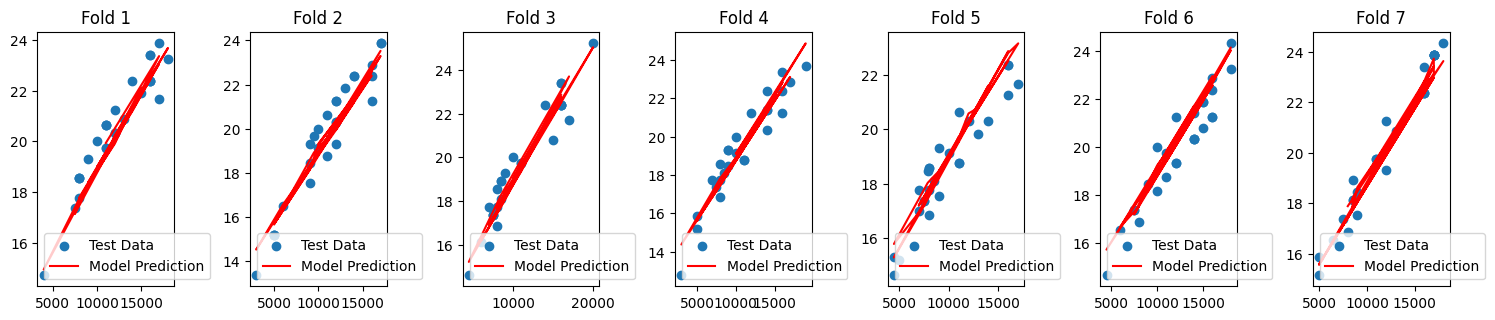

MSE promedio para K-Fold CV: 0.5755563581384796
[0.5895809340387058, 0.6139609181457926, 0.5123638183163896, 0.65030832704878, 0.5817373293182296, 0.6557746207306574, 0.4251685593708026]


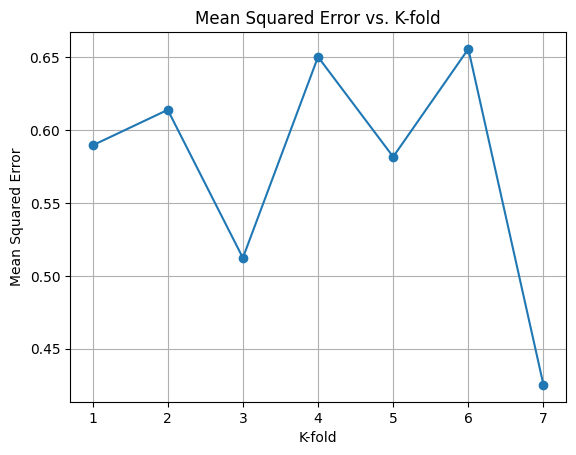

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold 

# Método 1: K-Fold Cross-Validation

k = 7 # Número de pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Lista para almacenar los MSE de cada pliegue
mse_scores = []

# Crear una figura para K-Fold
plt.figure(figsize=(15, 6))

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Ajustar el modelo de regresion ponderada en el conjunto de entrenamiento simulado
    modelo_fold = sm.WLS(y_train, X_train, weights=1/y_train**2)
    #Aquí se está ajustando un modelo ponderado utilizando los datos de entrenamiento 
    # X_train e y_train del pliegue actual. Los pesos se definen como el inverso del cuadrado de los valores de y_train
    resultados_fold = modelo_fold.fit()

    # Evaluar el modelo en el conjunto de prueba
    y_pred = resultados_fold.predict(X_test)

    # Calcular el Error Cuadrático Medio (MSE) para este pliegue
    mse = np.mean((y_test - y_pred) ** 2)
    mse_scores.append(mse)

    # Visualizar el ajuste del modelo para cada pliegue
    plt.subplot(2, k, fold)
    plt.scatter(X_test['listing_price'], y_test, label='Test Data')
    plt.plot(X_test['listing_price'], y_pred, label='Model Prediction', color='red')
    plt.title(f'Fold {fold}')
    plt.legend()
    fold += 1

# Calcular el MSE promedio para los pliegues
mean_mse = np.mean(mse_scores)

# Ajustar los espacios entre las gráficas para que se vean mejor
plt.tight_layout()

# Mostrar los resultados de la validación cruzada
plt.show()

# Mostrar el MSE promedio para los pliegues
print(f"MSE promedio para K-Fold CV: {mean_mse}")
print(mse_scores)

# Ahora vamos a graficar MSE versus K
plt.figure()
plt.plot(range(1, k+1), mse_scores, marker='o', linestyle='-')
plt.title('Mean Squared Error vs. K-fold')
plt.xlabel('K-fold')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, k+1)) 
plt.grid(True)
plt.show()

#K=Probado= 
#5= 0.5840902627265365
#4= 0.6040951333418089
#7= 0.5755563581384796

 La tendencia descendente para el  k de 7, significa que el modelo está obteniendo un menor error cuadrático medio a medida que aumenta la cantidad de folds en la validación cruzada, ya que más folds proprcionan una estimación más precisa del rendimiento del modelo. Esto sugiere que el modelo está generalizando bien y que es robusto ante diferentes particiones de los datos, lo cual es un indicador positivo de su capacidad para realizar predicciones precisas en datos no vistos. Al final se logra un MSE aprox. de 0.40.

<h3>Se aplica un k de 20  obteniendo un MSE  de 0.5668</h3>


C:\Users\DELL\AppData\Local\Temp\ipykernel_23936\2501728861.py:40: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


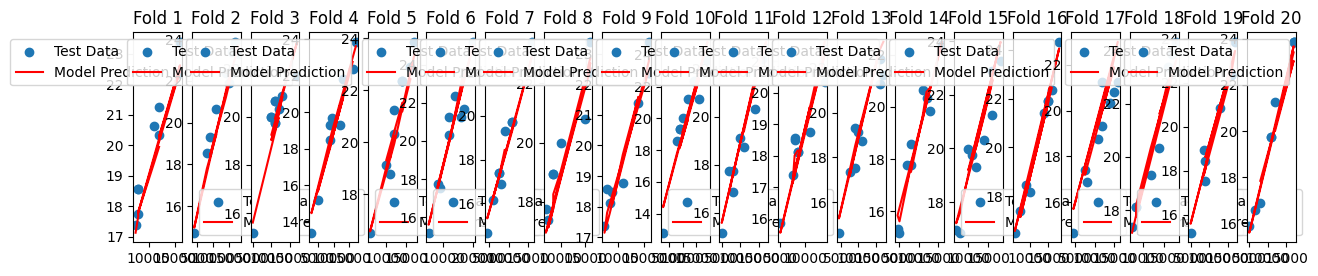

MSE promedio para K-Fold CV: 0.566831969657069


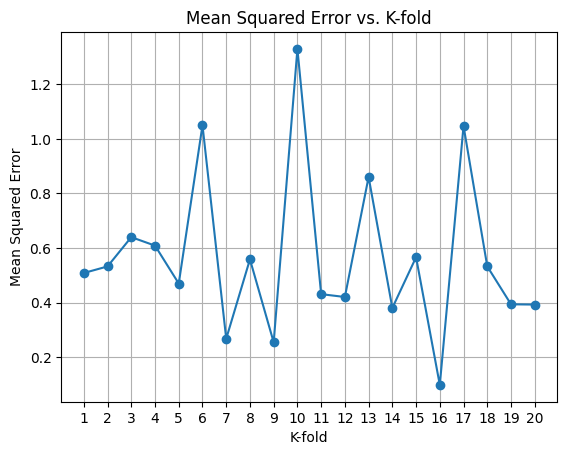

In [41]:

k = 20 # Número de pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Lista para almacenar los MSE de cada pliegue
mse_scores = []

# Crear una figura para K-Fold
plt.figure(figsize=(15, 6))

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Ajustar el modelo de regresion ponderada en el conjunto de entrenamiento simulado
    modelo_fold = sm.WLS(y_train, X_train, weights=1/y_train**2)
    # Aquí se está ajustando un modelo ponderado utilizando los datos de entrenamiento 
    # X_train e y_train del pliegue actual. Los pesos se definen como el inverso del cuadrado de los valores de y_train
    resultados_fold = modelo_fold.fit()

    # Evaluar el modelo en el conjunto de prueba
    y_pred = resultados_fold.predict(X_test)

    # Calcular el Error Cuadrático Medio (MSE) para este pliegue
    mse = np.mean((y_test - y_pred) ** 2)
    mse_scores.append(mse)

    # Visualizar el ajuste del modelo para cada pliegue
    plt.subplot(2, k, fold)
    plt.scatter(X_test['listing_price'], y_test, label='Test Data')
    plt.plot(X_test['listing_price'], y_pred, label='Model Prediction', color='red')
    plt.title(f'Fold {fold}')
    plt.legend()
    fold += 1

# Calcular el MSE promedio para los pliegues
mean_mse = np.mean(mse_scores)

# Ajustar los espacios entre las gráficas para que se vean mejor
plt.tight_layout()

# Mostrar los resultados de la validación cruzada
plt.show()

# Mostrar el MSE promedio para los pliegues
print(f"MSE promedio para K-Fold CV: {mean_mse}")

# Ahora vamos a graficar MSE versus K
plt.figure()
plt.plot(range(1, k+1), mse_scores, marker='o', linestyle='-')
plt.title('Mean Squared Error vs. K-fold')
plt.xlabel('K-fold')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, k+1)) 
plt.grid(True)
plt.show()

El resultado de la grafica sugiere que el modelo de cross validation en cada fold utilizando un k de 20 se observa que sube y baja de manera no tendencial ni ciclica , reflejando que el modelo en este numero de k pierde capacidad de generalizar la serie de datos. Sin embargo se muestra en los primeros y últimos folds una tendencia estable. Sin embargo en uno de estos (10), el MSE da mayor a 1, lo cuál se interpreta como gran cantidad de error y en el (16) se muestra como el menor error, incluso menor a 0,1.

## Decisión
La pregunta de negocio es que se desea saber que caracteristicas influyen en el precio de venta de los tenis Nike. Obteniendo así un modelo de regresión en donde las variables "'listing_price', 'category', 'rating', 'reviews'" son las que explican el precio de venta. 
Se observa que a medida que la calificación (rating) aumenta, su precio también aumenta. 

Así mismo, la decisión a tomar será fomentar la cantidad de reviews, de los productos que no son tan llamativos para tener así unos precios de venta más adecuados y no realizando el "pricing" debido a la baja en ventas de estos productos. 

Además se recomienda realizar un mejor control en la toma y registro de los datos, para así obtener un mejor modelo y mejores conclusiones para este. Por otro lado, se recomienda realizar una segmentación de precios en los productos para así establecer unos precios por categoría de producto, esto además de funcionar para el modelo de la empresa, facilitará la adquisición de los productos a sus clientes finales.

## **Bibliografía**

    Rojas-Jimenez, K. (s. f.). Capítulo 5 Transformación, Estandarización e Imputación de Datos | Ciencia de Datos para Ciencias Naturales. https://bookdown.org/keilor_rojas/CienciaDatos/transformaci%C3%B3n-estandarizaci%C3%B3n-e-imputaci%C3%B3n-de-datos.html

    Morales, O. o. O. (s. f.). Segmentación de Nike. https://prezi.com/mdppjswngofk/segmentacion-de-nike/

    Platzi. (s. f.). GitHub - platzi/algebra-lineal-python: Curso de Álgebra Lineal con Python -  Planeación. GitHub. https://github.com/platzi/algebra-lineal-python.git


